In [26]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
df = pd.read_csv(R"C:\Users\EzrasTorah\Downloads\train (1) - train (1).csv")

In [28]:
df = pd.read_csv('titanic_train.csv')
def drop_col(df,col):
    df.drop(columns=col, axis = 1, inplace = True)
def change_type(df, col, map_dict):
    df[col] = df[col].map(map_dict)
def drop_nan(df,col):
    df = df[df[col].notna()]
def change_age(df,age):
    df.loc[(df['Age'].isnull())&(df['Survived'] ==1), 'Age']= 28.34
    df.loc[(df['Age'].isnull())&(df['Survived']==0), 'Age']= 30.62
    df = df[df[age] <= 74]
def getDummies(df, col, dropfirst = True):
    df = pd.get_dummies(data = df, columns = [col], drop_first=dropfirst)
    return df
df['Survived'] = df['Survived'].astype(int)
drop_col(df,'Cabin')
drop_col(df,'PassengerId')
drop_col(df,'Name')
drop_col(df,'Ticket')
change_type(df,'Embarked',{'S':1,'C':2,'Q':3})
drop_nan(df,'Embarked')
drop_col(df,'Embarked')
change_age(df,'Age')
df = getDummies(df, 'Sex')
df = getDummies(df, 'Pclass', False)

<AxesSubplot:>

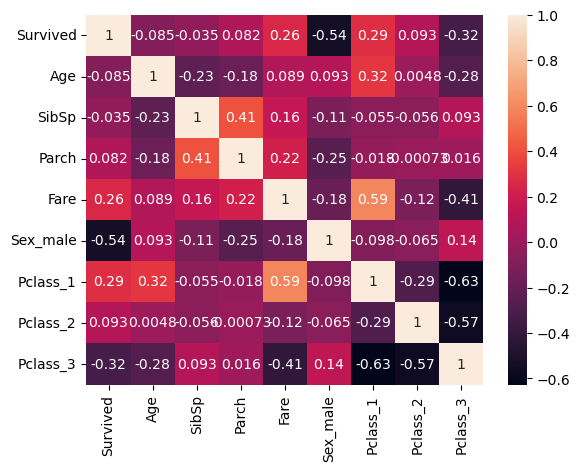

In [29]:
sns.heatmap(df.corr(), annot = True)

In [30]:
X = df.drop('Survived', axis = 1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

In [31]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled  = mms.transform(X_test)

# Random Forest Classifier

Basic Random Forest Model with default parameters:

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
rf_pred_train = rf.predict(X_train_scaled)
rf_accuracy_train = accuracy_score(rf_pred_train, y_train)
rf_pred_test = rf.predict(X_test_scaled)
rf_accuracy_test = accuracy_score(rf_pred_test, y_test)
print('\nTest Accuracy RF1: ',rf_accuracy_test)

rf_tn,rf_fp,rf_fn,rf_tp = confusion_matrix(y_test,rf_pred_test).ravel()
rf_precision = rf_tp/(rf_tp+rf_fp)
rf_recall = rf_tp/(rf_tp+rf_fn)

print('Precision RF1: ',rf_precision, '\nRecall RF1: ',rf_recall)


Test Accuracy RF1:  0.8435754189944135
Precision RF1:  0.7619047619047619 
Recall RF1:  0.7868852459016393


Random Forest Model with Parameters:

In [33]:
rf2 = RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18)
rf2.fit(X_train, y_train)
rf2_pred_train = rf2.predict(X_train)
rf2_accuracy_train = accuracy_score(rf2_pred_train, y_train)
rf2_pred_test = rf2.predict(X_test)
rf2_accuracy_test = accuracy_score(rf2_pred_test, y_test)
print('\nTest Accuracy RF2: ',rf2_accuracy_test)

rf2_tn,rf2_fp,rf2_fn,rf2_tp = confusion_matrix(y_test,rf2_pred_test).ravel()
rf2_precision = rf2_tp/(rf2_tp+rf2_fp)
rf2_recall = rf2_tp/(rf2_tp+rf2_fn)

print('Precision RF2: ',rf2_precision, '\nRecall RF2: ',rf2_recall)



Test Accuracy RF2:  0.8324022346368715
Precision RF2:  0.7924528301886793 
Recall RF2:  0.6885245901639344


Random Forest with Gridsearch:

In [34]:
#setting parameter options:
param_grid = {'n_estimators':range(10,500,50),'criterion':['gini', 'entropy', 'log_loss'], 'max_depth': range(3,10,2), 'max_features': ['sqrt', 'log2', None]}

#creating gridsearch instance:
rfgs = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=5,
                    verbose=3,
                    n_jobs=-1)

#fitting model:
rfgs.fit(X_train, y_train)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\ProgramData\Anaconda3\lib\site-package

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(3, 10, 2),
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': range(10, 500, 50)},
             verbose=3)

In [35]:

rfbest_est = rfgs.best_estimator_
rfbest_est.fit(X_train_scaled, y_train)
rfbest_est_pred_train = rfbest_est.predict(X_train_scaled)
rfbest_est_accuracy_train = accuracy_score(rfbest_est_pred_train, y_train)
rfbest_est_pred_test = rfbest_est.predict(X_test_scaled)
rfbest_est_accuracy_test = accuracy_score(rfbest_est_pred_test, y_test)
print('\nTest Accuracy Best Est: ',rfbest_est_accuracy_test)

rfbest_est_tn,rfbest_est_fp,rfbest_est_fn,rfbest_est_tp = confusion_matrix(y_test,rfbest_est_pred_test).ravel()
rfbest_est_precision = rfbest_est_tp/(rfbest_est_tp+rfbest_est_fp)
rfbest_est_recall = rfbest_est_tp/(rfbest_est_tp+rfbest_est_fn)

print('Precision Best Est: ',rfbest_est_precision, '\nRecall Best Est: ',rfbest_est_recall)


Test Accuracy Best Est:  0.8715083798882681
Precision Best Est:  0.88 
Recall Best Est:  0.7213114754098361
